In [102]:
# 농수축 & 이미용 EDAddd
# !pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm.notebook import tqdm
import requests
import xmltodict
import re
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# pd.set_option('display.max_rows', 100)
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [65]:
# scaler = RobustScaler()
# sum_df[['exp_min','unit_price']] = scaler.fit_transform(sum_df[['exp_min','unit_price']])

In [69]:
with open('c:/bc/low_perform_dict.pickle', 'rb') as f:
    low_perform_dict = pickle.load(f)
    
with open('c:/bc/high_perform_dict.pickle', 'rb') as f:
    high_perform_dict = pickle.load(f)

In [70]:
low_nsc = low_perform_dict['농수축']
high_nsc = high_perform_dict['농수축']
print(low_nsc.shape[0], high_nsc.shape[1])

189 27


In [71]:
low_nsc['score'] = 0
high_nsc['score'] = 1
nsc = pd.concat([low_nsc, high_nsc], axis=0)

In [87]:
# df[["A", "B"]] = min_max_scaler.fit_transform(df[["A", "B"]])
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [77]:
nsc_data = nsc[['exp_min','unit_price','DAY_NUM','season','timeslot','holiday','score']]
nsc_data.timeslot = nsc_data.timeslot.astype('int64')

nsc_data = pd.get_dummies(nsc_data, columns=['DAY_NUM'])
nsc_data = pd.get_dummies(nsc_data, columns=['season'])
nsc_data = pd.get_dummies(nsc_data, columns=['timeslot'])
nsc_data = pd.get_dummies(nsc_data, columns=['holiday'])

nsc_data[['exp_min','unit_price']] = minmaxscaler.fit_transform(nsc_data[['exp_min','unit_price']])

C:\Users\moon\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


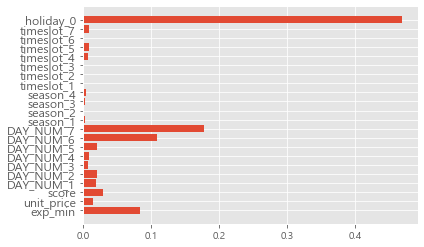

In [96]:
data = np.array(nsc_data)

x = data[:,0:-1]
y = data[:,-1]

trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)

rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf.fit(trainX, trainY)
fi = rf.feature_importances_
fn = list(nsc_data.columns)
n_f = trainX.shape[1]
idx = np.arange(n_f)
plt.barh(idx,fi,align = 'center')
plt.yticks(idx,fn,size=12)
plt.show()

In [101]:
data

array([[0.66666667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.95      , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.66666667, 0.45      , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.45      , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.45      , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [97]:
print('\nSubtree별 시험데이터 정확도 :')
for i in range(10):
    subTree = rf.estimators_[i]
    print('subtree (%d) = %.2f' % (i, subTree.score(trainX, trainY)))


Subtree별 시험데이터 정확도 :
subtree (0) = 0.99
subtree (1) = 0.97
subtree (2) = 0.95
subtree (3) = 1.00
subtree (4) = 1.00
subtree (5) = 1.00
subtree (6) = 0.93
subtree (7) = 0.99
subtree (8) = 0.99
subtree (9) = 0.98


In [91]:
sum_df = pd.read_csv('c:/bc/sum_df.csv')

In [98]:
sum_df.columns

Index(['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group',
       'unit_price', 'total_price', 'sales', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'SECOND', 'YEAR_DAY', 'DAY_NAME', 'DAY_NUM', 'p_group_code',
       'new_code', 'no', 'sales_level', 'grade', 'season', 'timeslot',
       'holiday', 'sales_group'],
      dtype='object')

In [93]:
nsc_data

,exp_min,unit_price,score,DAY_NUM_1,DAY_NUM_2,DAY_NUM_3,DAY_NUM_4,DAY_NUM_5,DAY_NUM_6,DAY_NUM_7,...,season_4,timeslot_1,timeslot_2,timeslot_3,timeslot_4,timeslot_5,timeslot_6,timeslot_7,holiday_0,holiday_1
9,0.666667,1.00,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
52,0.666667,1.00,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
93,0.333333,0.95,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
100,0.618333,0.15,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
152,0.666667,0.95,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,0.522222,0.45,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6785,0.666667,0.45,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
6801,0.666667,0.45,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
6880,0.666667,0.45,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

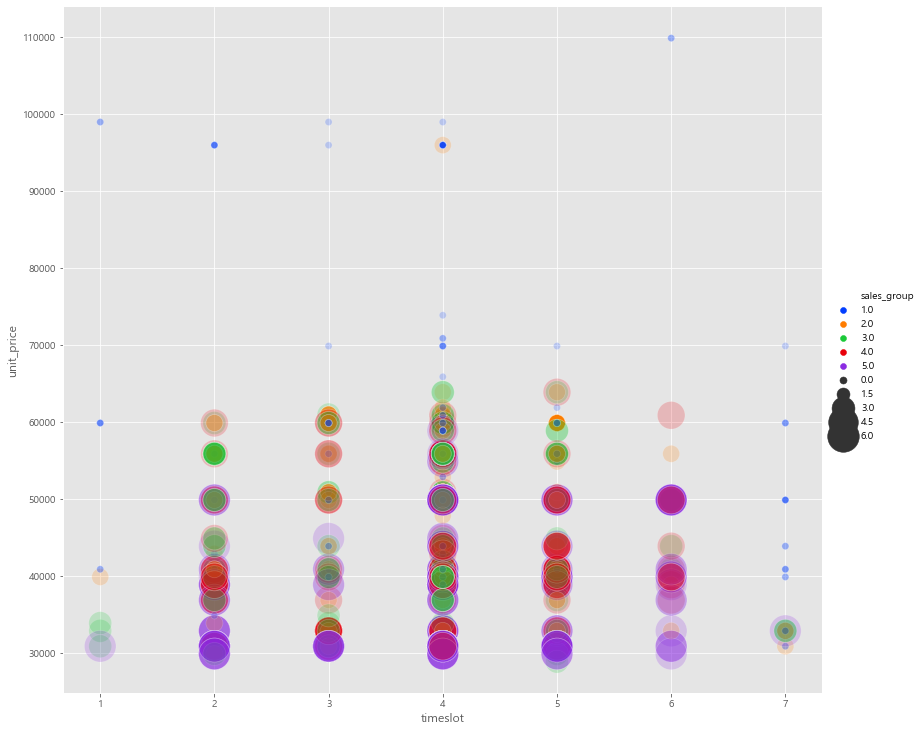

In [92]:
sns.relplot(x='timeslot',y='unit_price', palette='bright', size='sales_group', hue='sales_group', sizes=(50,1000), data=sum_df[sum_df['p_group']=='농수축'], alpha=0.2, height=10.27, aspect=11.7/10.27)

In [85]:
# DT pending

# dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
# dt.fit(trainX,trainY)
# plot_tree(dt)

왜 안될까?

1) 핵심 단가를 구한 그래프에서 exp_min에 대한 보정처리가 되지 않아서 당연히 exp_min이 작은 상품의 판매량이 저조할 것이라고 생각했다.
    - 판매량/exp_min = sales_min(분당 판매량)을 구해줌으로써 보정처리를 해주었지만(제대로 된 보정인지는 의문) 결과는 비슷하게 나왔다.

2) 1)의 작업을 수행하지 않고 decision tree를 그려보았을 때 exp_min의 중요도가 계속해서 높게 나와 1)의 작업을 수행하였지만 효과는 없었다.

3) 트리를 이용해서 exp_min 외에 중요한 변수를 찾는 방법은 무엇이 있을까? exp_min의 중요도가 왜 계속해서 높게 나올까? 노출분에 대한 보정이 제대로 이루어진 것 같지 않다.

9/27  
exp_min & unit_price 모두 min_max scaler하니 평일/휴일 관련 변수의 중요도가 높게 나왔다.